This code should reveal any correlations between Covid and heart attacks, after my annalyis it appears that, suprisingly, if you have had covid
you are less likely to have a heart attack, around 16% less likely, kind of suprising. Unfortunatley, I don't have the entries available to explore why this is, and at most, it could simply be a mater of correlation =/ causation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import os

In [2]:
path = os.path.join("..","datasetDNM","heart_2022_no_nans.csv")
HeartData = pd.read_csv(path)
HeartData

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [3]:
rowCount = len(HeartData.index)
rowCount

246022

In [4]:
posHeartAttack = HeartData.loc[(HeartData['HadHeartAttack'] == 'Yes')]
posHeartAttack.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
7,Alabama,Male,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,Yes,...,1.75,74.84,24.37,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
12,Alabama,Male,Good,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,5.0,"6 or more, but not all",Yes,...,1.88,115.67,32.74,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
34,Alabama,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,Yes,...,1.78,71.67,22.67,No,No,Yes,Yes,"Yes, received Tdap",No,No
37,Alabama,Male,Good,3.0,27.0,Within past year (anytime less than 12 months ...,Yes,5.0,"6 or more, but not all",Yes,...,1.85,123.83,36.02,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,Yes
43,Alabama,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,Yes,...,1.78,95.25,30.13,No,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No


In [5]:
negHeartAttack = HeartData.loc[(HeartData['HadHeartAttack'] == 'No')]
negHeartAttack.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [6]:
#Positive heart attack
posHeartAttackCount = len(posHeartAttack.index)
posCovidCountWHeartAttack = posHeartAttack["CovidPos"].isin(["Yes", "Tested positive using home test without a health professional"]).sum()
print(posHeartAttackCount)
print(posCovidCountWHeartAttack)

13435
3659


In [7]:
negHeartAttackCount = len(negHeartAttack.index)
posCovidCountWOHeartAttack = negHeartAttack["CovidPos"].isin(["Yes", "Tested positive using home test without a health professional"]).sum()
print(negHeartAttackCount)
print(posCovidCountWOHeartAttack)

232587
75057


In [8]:
"Chances of someone having a heart attack and covid, in percent"
percentOfHeartAttackCovid =  posCovidCountWHeartAttack /posHeartAttackCount *100
percentOfNoHeartAttackCovid =  posCovidCountWOHeartAttack /negHeartAttackCount *100
print(percentOfHeartAttackCovid)
print(percentOfNoHeartAttackCovid) 

27.23483438779308
32.27050523030092


In [9]:
"How much more or less likely to have a heart attack with covid?"
differenceCovidWorWOHeartAttack = (percentOfHeartAttackCovid - percentOfNoHeartAttackCovid) / ((percentOfHeartAttackCovid + percentOfNoHeartAttackCovid) / 2) * 100
if differenceCovidWorWOHeartAttack >= 0:
    summaryDifference = f"Percentage More Likely to Have Heart Attack & Covid"
else:
    summaryDifference = f"Percentage Less Likey to Have Heart Attack & Covid"
    differenceCovidWorWOHeartAttack = differenceCovidWorWOHeartAttack * -1
print(summaryDifference)
print(differenceCovidWorWOHeartAttack)

Percentage Less Likey to Have Heart Attack & Covid
16.925105796645607


In [10]:
"Overall covid percentage"
overallCovidCount = posCovidCountWHeartAttack + posCovidCountWOHeartAttack
overallCovidPercent = overallCovidCount/ rowCount *100
print(overallCovidCount)
print(overallCovidPercent)

78716
31.995512596434466


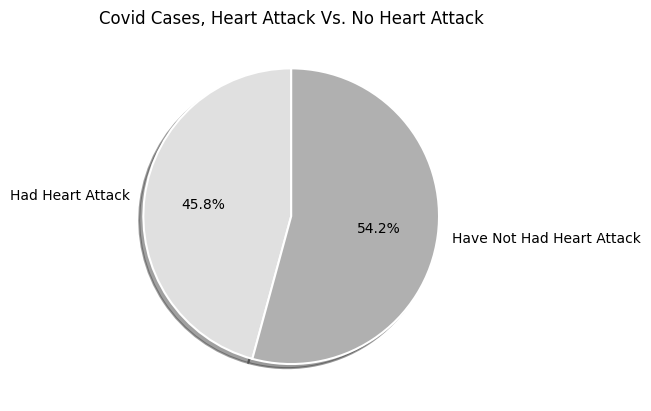

In [11]:
"Covid with vs. without heart attack pyplot pie graph"
CovidPositiveWWoHeartAttack = [percentOfHeartAttackCovid, percentOfNoHeartAttackCovid]
colors = ['#E0E0E0', '#B0B0B0']

plt.pie(CovidPositiveWWoHeartAttack, labels=["Had Heart Attack","Have Not Had Heart Attack"], autopct="%1.1f%%", colors=colors, shadow=True, startangle=90,
       wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})

plt.title("Covid Cases, Heart Attack Vs. No Heart Attack")
plt.show
path = os.path.join("..","media","PercentPie.PNG")
plt.savefig(path)

<function matplotlib.pyplot.show(close=None, block=None)>

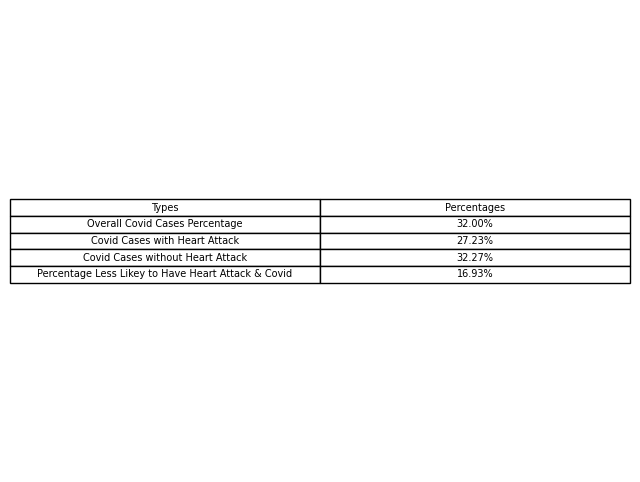

In [12]:
Summary = { "Types": ["Overall Covid Cases Percentage","Covid Cases with Heart Attack",
                        "Covid Cases without Heart Attack", summaryDifference],
            "Percentages": [f"{overallCovidPercent:.2f}%", f"{percentOfHeartAttackCovid:.2f}%", f"{percentOfNoHeartAttackCovid:.2f}%",
            f"{differenceCovidWorWOHeartAttack:.2f}%"]
            }
Summary = pd.DataFrame(Summary)

fig, ax = plt.subplots(figsize=(8,6))
ax.axis('off')

table = ax.table(cellText=Summary.values, colLabels=Summary.columns, cellLoc='center', loc='center')

path = os.path.join("..","media","SummaryTable.PNG")
plt.savefig(path)
plt.show